# Ticket to Talent: The H-1B Lottery Insight

Contributors: Manyi Hong, Ruo-Rong Wang, Ruoxian Zhang, Shreya Lodha, Yiyou Chen, Zeran Huang

**Problem Definition:** This project will analyze the essential factors that affect H-1B visa approvals, emphasizing the demographics of applicants such as gender, age, nationality, and education as well as the characteristics of employers, including industry sector and geographic distribution. We seek to uncover patterns in successful applications by examining trends from the last three years. These trends will show us the changing demand for international talent, giving important insights and recommendations to future applicants on making informed decisions about potential employers and regions with higher H-1B approval rates. Comparing this with the general context of the US job market, this project aims to identify sectors with both high H-1B approval rates and favorable employment conditions. We seek to provide a deeper understanding of where international talent is in demand and what types of roles may offer competitive wages, improving our recommendations for H-1B applicants.

**Motivation:** This research will examine essential elements influencing H-1B visa approvals, offering international professionals valuable, data-backed insights into the companies, industries, locations, and career paths. Analyzing demand trends for international professionals provides crucial insights as they maneuver through the competitive and unpredictable H-1B environment. We are also all international students in the team, so this is personally relevant to our careers as well.

**Data Source:**

1. The first dataset is originally from the US Department of Homeland Security, and is hosted by Bloomberg in the following GitHub repository: https://github.com/BloombergGraphics/2024-h1b-immigration-data
We examined the following CSV files. Each file contains at least 100,000 rows of data:
- H1B visa statistics for 2021: TRK_13139_FY2021.csv
- H1B visa statistics for 2022: TRK_13139_FY2022.csv
- H1B visa statistics for 2023: TRK_13139_FY2023.csv

2.  The second dataset comprises state-level data for 2021 to 2023, covering various socio-economic indicators such as GDP, GDP per capita, median household income, population, and unemployment rates. This data was collected from multiple official U.S. government websites, including USAFacts, Wisevoter, and the United States Census Bureau. The dataset includes calculated fields for each state, namely the "GDP ratio of state" and "population ratio of state." These datasets are available on GitHub: https://github.com/MANYI-anewbird/775.git
We examined the following Excel files:
- 2021 State Information.xslx
- 2022 State Information.xslx
- 2023 State Information.xslx


**Executive Summary:** This project analyzes key factors affecting H-1B visa approvals, focusing on demographics like age, gender, nationality, and education level, as well as employer characteristics such as industry sector and geographic location. Using data from the past three years, we identify patterns in successful applications, providing insights into the evolving demand for international talent, which is especially relevant to us as international students exploring U.S. career paths. After cleaning and merging datasets, our findings show that applicants aged 25-34 with advanced degrees have the highest approval rates, with males and candidates from India and China dominating approvals. The technology sector, particularly industries such as Hobby, Toy, and Game Stores, displays strong growth, and higher education correlates with higher wage offers. Based on these findings, we recommend future applicants to pursue advanced degrees and target high-growth industries to enhance their chances of H-1B approval.

**Data Uploading and Cleaning:**
We uploaded the files to Google Cloud Storage first and then uploaded them to BigQuery. Then, we individually defined the scheme for each file, where we specified the datatype as string for each column (following standard practices). The data cleaning process involved managing null values in datasets for 2021, 2022, and 2023 using BigQuery. We first checked for null values in specific columns to identify which ones contain significant missing data. Columns with excessive null values (over 95%) were dropped from the dataset to simplify further analysis and improve data quality. Next, rows were identified with high number of null values across columns important to our analysis. These rows were then deleted to ensure the dataset retains only complete and usable records. We chose to directly delete these rows because data imputation was not option, giving the high confidentiality around such records.

## Data Cleaning

In [261]:
from google.cloud import bigquery
client = bigquery.Client()


### Checking null columns - 2021

In [262]:
%%bigquery
SELECT 
COUNT(CASE WHEN `FULL_TIME_IND` IS NULL THEN 1 END) AS missing_column1,
COUNT(CASE WHEN `WAGE_AMT` IS NULL THEN 1 END) AS missing_column2,
COUNT(CASE WHEN `WAGE_UNIT` IS NULL THEN 1 END) AS missing_column3,
COUNT(CASE WHEN `S1Q1B` IS NULL THEN 1 END) AS missing_column4,
COUNT(CASE WHEN `T_U_VAWA_FLAG` IS NULL THEN 1 END) AS missing_column5,
FROM `ba775-project-team-6.h1b_dataset.2021`

Query is running:   0%|          |

Downloading:   0%|          |

,missing_column1,missing_column2,missing_column3,missing_column4,missing_column5
0,269377,269377,269377,269377,269377


### Deleting null columns - 2021

In [263]:
%%bigquery
ALTER TABLE `ba775-project-team-6.h1b_dataset.2021`
DROP COLUMN `FULL_TIME_IND`,
DROP COLUMN `WAGE_AMT`,
DROP COLUMN `WAGE_UNIT`,
DROP COLUMN `S1Q1B`,
DROP COLUMN `T_U_VAWA_FLAG`

Query is running:   0%|          |

""


### Checking null rows - 2021

In [264]:
%%bigquery
DECLARE null_check_query STRING;

SET null_check_query = (
  SELECT 'SELECT * FROM `ba775-project-team-6.h1b_dataset.2021` WHERE ' || 
         STRING_AGG("`" || column_name || "` IS NULL", " OR ")
  FROM `ba775-project-team-6.h1b_dataset.INFORMATION_SCHEMA.COLUMNS`
  WHERE table_name = '2021'
);

EXECUTE IMMEDIATE null_check_query;

Query is running:   0%|          |

Downloading:   0%|          |

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,NUM_OF_EMP_IN_US,S1Q1A,BEN_EDUCATION_CODE,ED_LEVEL_DEFINITION,BEN_PFIELD_OF_STUDY,BEN_COMP_PAID,DOT_CODE,NAICS_CODE,S3Q1,S4Q1
0,(b)(6),CHN,CHN,(b)(6),1981,male,D&R I.P. Law Firm,453745389,108 N Ynez Ave,Monterey Park,...,None,None,None,None,None,None,None,None,None,None
1,(b)(6),PAK,PAK,(b)(6),1993,male,Crorama Inc.,208487164,391 Thor Pl,Brea,...,None,None,None,None,None,None,None,None,None,None
2,(b)(6),CHN,CHN,(b)(6),1993,female,"Becton, Dickinson and Company",220760120,1 Becton Dr,Franklin Lks,...,None,None,None,None,None,None,None,None,None,None
3,(b)(6),IND,IND,(b)(6),1991,female,Visa Technology & Operations LLC,743070018,900 Metro Center Blvd.,Foster City,...,None,None,None,None,None,None,None,None,None,None
4,(b)(6),IND,IND,(b)(6),1994,female,Puja Holdings LLC,454016252,51 Gate House Rd,Chestnut Hill,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230674,(b)(6),IND,IND,(b)(6),1983,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,0,Y,F,BACHELOR'S DEGREE,ELECTRONIC ENGINEERING,104419,033,541512,B,None
230675,(b)(6),IND,IND,(b)(6),1993,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,37131,Y,G,MASTER'S DEGREE,COMP SCI,83242,030,541512,B,Y
230676,(b)(6),IND,IND,(b)(6),1992,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,0,Y,G,MASTER'S DEGREE,COMPUTER SCIENCE,93600,030,541512,B,Y
230677,(b)(6),IND,IND,(b)(6),1992,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,0,Y,G,MASTER'S DEGREE,SYSS MGT/INFO SYSS,96408,033,541512,M,Y


### Deleting null rows - 2021

In [265]:
%%bigquery
DECLARE delete_null_query STRING;
SET delete_null_query = (
  SELECT 'DELETE FROM `ba775-project-team-6.h1b_dataset.2021` WHERE ' || 
         STRING_AGG("`" || column_name || "` IS NULL", " OR ")
  FROM `ba775-project-team-6.h1b_dataset.INFORMATION_SCHEMA.COLUMNS`
  WHERE table_name = '2021'
);
EXECUTE IMMEDIATE delete_null_query;
SELECT COUNT(*) AS remaining_rows
FROM `ba775-project-team-6.h1b_dataset.2021`;

Query is running:   0%|          |

Downloading:   0%|          |

,remaining_rows
0,38745


### Checking null columns - 2022

In [266]:
%%bigquery
SELECT 
COUNT(CASE WHEN `FULL_TIME_IND` IS NULL THEN 1 END) AS missing_column1,
COUNT(CASE WHEN `WAGE_AMT` IS NULL THEN 1 END) AS missing_column2,
COUNT(CASE WHEN `WAGE_UNIT` IS NULL THEN 1 END) AS missing_column3,
COUNT(CASE WHEN `S1Q1B` IS NULL THEN 1 END) AS missing_column4,
COUNT(CASE WHEN `T_U_VAWA_FLAG` IS NULL THEN 1 END) AS missing_column5,
FROM `ba775-project-team-6.h1b_dataset.2022`

Query is running:   0%|          |

Downloading:   0%|          |

,missing_column1,missing_column2,missing_column3,missing_column4,missing_column5
0,301419,301419,301419,301419,301419


### Deleting null columns - 2022

In [267]:
%%bigquery
ALTER TABLE `ba775-project-team-6.h1b_dataset.2022`
DROP COLUMN `FULL_TIME_IND`,
DROP COLUMN `WAGE_AMT`,
DROP COLUMN `WAGE_UNIT`,
DROP COLUMN `S1Q1B`,
DROP COLUMN `T_U_VAWA_FLAG`

Query is running:   0%|          |

""


### Checking null rows - 2022

In [268]:
%%bigquery
DECLARE null_check_query STRING;

SET null_check_query = (
  SELECT 'SELECT * FROM `ba775-project-team-6.h1b_dataset.2022` WHERE ' || 
         STRING_AGG("`" || column_name || "` IS NULL", " OR ")
  FROM `ba775-project-team-6.h1b_dataset.INFORMATION_SCHEMA.COLUMNS`
  WHERE table_name = '2022'
);

EXECUTE IMMEDIATE null_check_query;

Query is running:   0%|          |

Downloading:   0%|          |

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,NUM_OF_EMP_IN_US,S1Q1A,BEN_EDUCATION_CODE,ED_LEVEL_DEFINITION,BEN_PFIELD_OF_STUDY,BEN_COMP_PAID,DOT_CODE,NAICS_CODE,S3Q1,S4Q1
0,(b)(6),IND,IND,(b)(6),1991,male,Client Software Services LLC.,460525861,101 Lakeforest Blvd,Gaithersburg,...,None,None,None,None,None,None,None,None,None,None
1,(b)(6),IND,IND,(b)(6),1995,male,"Primera Technology, Inc.",411899601,2 Carlson Pkwy N Ste 375,Plymouth,...,None,None,None,None,None,None,None,None,None,None
2,(b)(6),IND,IND,(b)(6),1989,male,SOFTWARE ENTERPRISE LLC,260452051,360 Bloomfield Ave,Windsor,...,None,None,None,None,None,None,None,None,None,None
3,(b)(6),IND,IND,(b)(6),1992,male,TAG Cyber LLC,811549893,9 Camelot Dr,Byram Twp,...,None,None,None,None,None,None,None,None,None,None
4,(b)(6),IND,IND,(b)(6),1980,male,Bonzer LLC,862091181,650 Warrenville Rd,Lisle,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264252,(b)(6),IND,IND,(b)(6),1987,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,0,Y,F,BACHELOR'S DEGREE,INFORMATION TECHNOLOGY,114067,030,541512,B,Y
264253,(b)(6),IND,IND,(b)(6),1989,female,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,0,Y,F,BACHELOR'S DEGREE,ELECTRONIC ENGINEERING,72550,030,541512,B,Y
264254,(b)(6),IND,IND,(b)(6),1988,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,32249,Y,F,BACHELOR'S DEGREE,ELECTRONIC ENGINEERING,84198,030,541512,B,Y
264255,(b)(6),IND,IND,(b)(6),1986,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,0,Y,F,BACHELOR'S DEGREE,COMP INFO SYSS,75213,030,541512,B,Y


### Deleting null rows - 2022

In [269]:
%%bigquery
DECLARE delete_null_query STRING;
SET delete_null_query = (
  SELECT 'DELETE FROM `ba775-project-team-6.h1b_dataset.2022` WHERE ' || 
         STRING_AGG("`" || column_name || "` IS NULL", " OR ")
  FROM `ba775-project-team-6.h1b_dataset.INFORMATION_SCHEMA.COLUMNS`
  WHERE table_name = '2022'
);
EXECUTE IMMEDIATE delete_null_query;
SELECT COUNT(*) AS remaining_rows
FROM `ba775-project-team-6.h1b_dataset.2022`;

Query is running:   0%|          |

Downloading:   0%|          |

,remaining_rows
0,37190


### Checking null columns - 2023

In [270]:
%%bigquery
SELECT 
COUNT(CASE WHEN `FULL_TIME_IND` IS NULL THEN 1 END) AS missing_column1,
COUNT(CASE WHEN `WAGE_AMT` IS NULL THEN 1 END) AS missing_column2,
COUNT(CASE WHEN `WAGE_UNIT` IS NULL THEN 1 END) AS missing_column3,
COUNT(CASE WHEN `S1Q1B` IS NULL THEN 1 END) AS missing_column4,
COUNT(CASE WHEN `T_U_VAWA_FLAG` IS NULL THEN 1 END) AS missing_column5,
FROM `ba775-project-team-6.h1b_dataset.2023`

Query is running:   0%|          |

Downloading:   0%|          |

,missing_column1,missing_column2,missing_column3,missing_column4,missing_column5
0,425134,380369,380356,414127,474384


### Deleting null columns - 2023

In [271]:
%%bigquery
ALTER TABLE `ba775-project-team-6.h1b_dataset.2023`
DROP COLUMN `FULL_TIME_IND`,
DROP COLUMN `WAGE_AMT`,
DROP COLUMN `WAGE_UNIT`,
DROP COLUMN `S1Q1B`,
DROP COLUMN `T_U_VAWA_FLAG`

Query is running:   0%|          |

""


### Checking null rows - 2023

In [272]:
%%bigquery
DECLARE null_check_query STRING;

SET null_check_query = (
  SELECT 'SELECT * FROM `ba775-project-team-6.h1b_dataset.2023` WHERE ' || 
         STRING_AGG("`" || column_name || "` IS NULL", " OR ")
  FROM `ba775-project-team-6.h1b_dataset.INFORMATION_SCHEMA.COLUMNS`
  WHERE table_name = '2023'
);

EXECUTE IMMEDIATE null_check_query

Query is running:   0%|          |

Downloading:   0%|          |

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,NUM_OF_EMP_IN_US,S1Q1A,BEN_EDUCATION_CODE,ED_LEVEL_DEFINITION,BEN_PFIELD_OF_STUDY,BEN_COMP_PAID,DOT_CODE,NAICS_CODE,S3Q1,S4Q1
0,(b)(6),IND,IND,(b)(6),1991,female,"ArisGlobal, LLC.",043604669,3119 Ponce De Leon Blvd,Coral Gables,...,None,None,None,None,None,None,None,None,None,None
1,(b)(6),IND,IND,(b)(6),1994,male,SDVS Technologies LLC,453867624,3535 Firewheel Dr,Flower Mound,...,None,None,None,None,None,None,None,None,None,None
2,(b)(6),IND,IND,(b)(6),1992,female,CONCH TECHNOLOGIES INC,201105490,6750 Poplar Ave,Memphis,...,None,None,None,None,None,None,None,None,None,None
3,(b)(6),IND,IND,(b)(6),1984,female,SVATS Inc,465653357,589 Carle Ave,Lewis Center,...,None,None,None,None,None,None,None,None,None,None
4,(b)(6),IND,IND,(b)(6),1991,male,MOBILE PROGRAMMING LLC,272405855,30300 Agoura Rd,Agoura Hills,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450594,(b)(6),IND,IND,(b)(6),1990,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,32249,Y,F,BACHELOR'S DEGREE,ELECTRONIC ENGINEERING,103126,030,541512,B,N
450595,(b)(6),IND,IND,(b)(6),1986,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,32249,Y,None,None,APPLIED COMPUTER SCIENCE,90397,030,541512,B,Y
450596,(b)(6),IND,IND,(b)(6),1991,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,32249,Y,F,BACHELOR'S DEGREE,COMPUTER ENGINEERING,76856,033,541512,B,N
450597,(b)(6),IND,IND,(b)(6),1988,male,Cognizant Technology Solutions US Corp,133924155,211 Quality Circle,College Station,...,32249,Y,None,None,APPLIED COMPUTER SCIENCE,85301,030,541512,B,N


### Deleting null rows - 2023

In [273]:
%%bigquery
DECLARE delete_null_query STRING;
SET delete_null_query = (
  SELECT 'DELETE FROM `ba775-project-team-6.h1b_dataset.2023` WHERE ' || 
         STRING_AGG("`" || column_name || "` IS NULL", " OR ")
  FROM `ba775-project-team-6.h1b_dataset.INFORMATION_SCHEMA.COLUMNS`
  WHERE table_name = '2023'
);
EXECUTE IMMEDIATE delete_null_query;
SELECT COUNT(*) AS remaining_rows
FROM `ba775-project-team-6.h1b_dataset.2023`;

Query is running:   0%|          |

Downloading:   0%|          |

,remaining_rows
0,23822


## Merging Datasets

### Left join for 2021 H-1B and state data

In [274]:
%%bigquery
SELECT *
FROM ba775-project-team-6.h1b_dataset.2021 AS h
LEFT JOIN ba775-project-team-6.state_data.2021 AS s
ON h.state = s.`id of state`;


Query is running:   0%|          |

Downloading:   0%|          |

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,S4Q1,id of state,state_1,GDP of state,GDP ratio of state,GDP per capital of state,Median Household Income by State,Unemployment Rates of state,population of state,population ratio of state
0,(b)(6),ZAF,ZAF,(b)(6),1976,male,Amazon.com Services LLC,820544687,2201 Westlake Ave,Seattle,...,N,WA,Washington,6.7749E+11,2.92%,"73,755",98150,5.20%,7741433,2.33%
1,(b)(6),CHN,CHN,(b)(6),1988,male,SolidEnergy Systems LLC,455099788,35 Cabot Road,Woburn,...,N,MA,Massachusetts,6.41332E+11,2.77%,"83,593",96940,5.40%,6991951,2.11%
2,(b)(6),BRA,NZL,(b)(6),1975,male,WEX Inc.,010526993,97 Darling Ave,S Portland,...,N,ME,Maine,77963300000,0.34%,"58,272",79660,4.70%,1378787,0.42%
3,(b)(6),FRA,FRA,(b)(6),1988,male,Airbus Americas Inc.,133243459,2550 Wasser Ter,Herndon,...,N,VA,Virginia,6.04958E+11,2.61%,"66,190",89890,3.90%,8657348,2.61%
4,(b)(6),SAU,BGD,(b)(6),1994,male,RANE PRECISION DIE CASTING INC,611154640,232 Hopkinsville Rd,Russellville,...,N,KY,Kentucky,2.37182E+11,1.02%,"51,298",62290,4.50%,4507600,1.36%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38740,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
38741,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
38742,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
38743,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None


### Left join for 2022 H-1B and state data

In [275]:
%%bigquery
SELECT *
FROM ba775-project-team-6.h1b_dataset.2022 AS h
LEFT JOIN ba775-project-team-6.state_data.2022 AS s
ON h.state = s.`id of state`;


Query is running:   0%|          |

Downloading:   0%|          |

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,S4Q1,id of state,state_1,GDP of state,GDP ratio of state,GDP per capital of state,Median Household Income by State,Unemployment Rates of state,population of state,population ratio of state
0,(b)(6),IND,IND,(b)(6),1982,male,"Capgemini America, Inc.",222575929,333 West Wacker Drive,Chicago,...,Y,IL,Illinois,1033310100000,4.08%,68822,"81,120",4.60%,12582515,3.78%
1,(b)(6),BRA,BRA,(b)(6),1978,male,"Tetra Pak, Inc.",751537534,3300 Airport Road,Denton,...,Y,TX,Texas,2355959700000,9.31%,61985,"77,600",3.90%,30029848,9.01%
2,(b)(6),ITA,ITA,(b)(6),1969,male,"Tetra Pak, Inc.",751537534,3300 Airport Road,Denton,...,Y,TX,Texas,2355959700000,9.31%,61985,"77,600",3.90%,30029848,9.01%
3,(b)(6),IND,IND,(b)(6),1992,male,SOFTWARE ENTERPRISE LLC,260452051,360 Bloomfield Ave,Windsor,...,Y,CT,Connecticut,321844600000,1.27%,84972,"94,340",4.10%,3608706,1.08%
4,(b)(6),IND,IND,(b)(6),1992,male,IT Division Inc,371528325,5955 Parkway North Blvd,Cumming,...,Y,GA,Georgia,755697900000,2.99%,57129,"70,420",3.10%,10913150,3.27%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37185,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
37186,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
37187,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
37188,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None


### Left join for 2023 H-1B and state data

In [276]:
%%bigquery
SELECT *
FROM ba775-project-team-6.h1b_dataset.2023 AS h
LEFT JOIN ba775-project-team-6.state_data.2023 AS s
ON h.state = s.`id of state`;

Query is running:   0%|          |

Downloading:   0%|          |

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,S4Q1,id of state,state_1,GDP of state,GDP ratio of state,GDP per capital of state,Median Household Income by State,Unemployment Rates of state,population of state,population ratio of state
0,(b)(6),IND,IND,(b)(6),1975,male,TRINCHESE IRON WORKS & CONSTRUCTION INC,200236706,234 Belmont Ave,Brooklyn,...,N,NY,New York,1775710000000,8.25%,110980,"81,600",4.00%,19571216,5.93%
1,(b)(6),MYS,MYS,(b)(6),1984,female,"PayPal, Inc.",770510487,2211 N 1st St,San Jose,...,N,CA,California,3233150000000,15.03%,99329,"89,870",4.80%,38965193,11.81%
2,(b)(6),GBR,GBR,(b)(6),1982,male,"Red Box Recorders, Ltd.",981226347,450 Lexington Avenue,New York,...,N,NY,New York,1775710000000,8.25%,110980,"81,600",4.00%,19571216,5.93%
3,(b)(6),IND,IND,(b)(6),1989,female,R1 RCM Inc.,020698101,"Triangle Plaza, 8750 W. Bryn Mawr",Chicago,...,N,IL,Illinois,875510000000,4.07%,87520,"87,820",4.50%,12549689,3.81%
4,(b)(6),KOR,KOR,(b)(6),1992,male,JDC HEALTHCARE PLLC,752518300,3030 Lbj Fwy.,Dallas,...,N,TX,Texas,2032930000000,9.45%,84708,"79,060",3.90%,30503301,9.25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23817,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
23818,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
23819,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
23820,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None


### Combining all data for 2021, 2022, 2023

In [277]:
%%bigquery
SELECT *
FROM (
    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2021` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2021` AS s
    ON h.state = s.`id of state`

    UNION ALL

    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2022` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2022` AS s
    ON h.state = s.`id of state`

    UNION ALL

    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2023` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2023` AS s
    ON h.state = s.`id of state`
)

Query is running:   0%|          |

Downloading:   0%|          |

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,S4Q1,id of state,state_1,GDP of state,GDP ratio of state,GDP per capital of state,Median Household Income by State,Unemployment Rates of state,population of state,population ratio of state
0,(b)(6),IND,IND,(b)(6),1975,male,TRINCHESE IRON WORKS & CONSTRUCTION INC,200236706,234 Belmont Ave,Brooklyn,...,N,NY,New York,1775710000000,8.25%,110980,"81,600",4.00%,19571216,5.93%
1,(b)(6),MYS,MYS,(b)(6),1984,female,"PayPal, Inc.",770510487,2211 N 1st St,San Jose,...,N,CA,California,3233150000000,15.03%,99329,"89,870",4.80%,38965193,11.81%
2,(b)(6),GBR,GBR,(b)(6),1982,male,"Red Box Recorders, Ltd.",981226347,450 Lexington Avenue,New York,...,N,NY,New York,1775710000000,8.25%,110980,"81,600",4.00%,19571216,5.93%
3,(b)(6),IND,IND,(b)(6),1989,female,R1 RCM Inc.,020698101,"Triangle Plaza, 8750 W. Bryn Mawr",Chicago,...,N,IL,Illinois,875510000000,4.07%,87520,"87,820",4.50%,12549689,3.81%
4,(b)(6),KOR,KOR,(b)(6),1992,male,JDC HEALTHCARE PLLC,752518300,3030 Lbj Fwy.,Dallas,...,N,TX,Texas,2032930000000,9.45%,84708,"79,060",3.90%,30503301,9.25%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99752,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
99753,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
99754,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None
99755,(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),(b)(3) (b)(6) (b)(7)(c),...,(b)(3) (b)(6) (b)(7)(c),None,None,None,None,None,None,None,None,None


## Beneficiary Demographics

### Are there significant gender imbalances across different job positions or employers?

In [278]:
query = """
SELECT 
    gender,
    COUNT(*) AS approved_count,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) AS gender_percentage
FROM 
    (
        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2021` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2021` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2022` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2022` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2023` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2023` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
    ) AS h
GROUP BY gender
ORDER BY gender_percentage DESC;
"""

gender = client.query(query).to_dataframe()
gender.head()

,gender,approved_count,gender_percentage
0,male,62823,63.16
1,female,36647,36.84


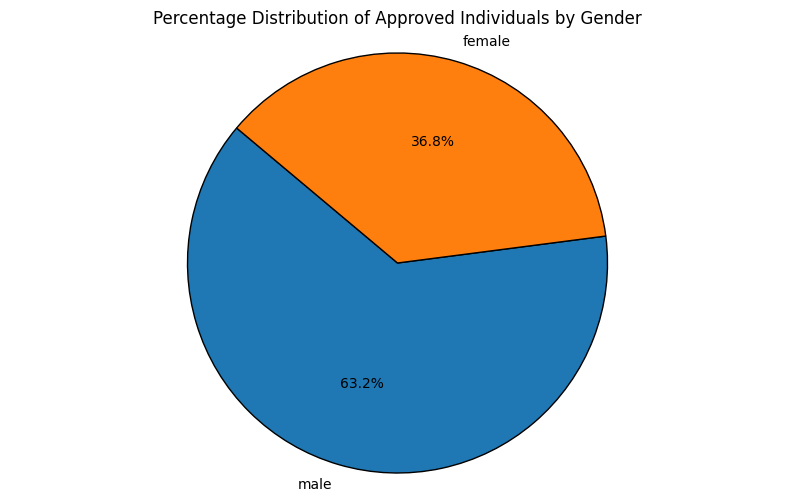

In [279]:
import matplotlib.pyplot as plt
gender_groups = ['male', 'female']
percentages = [63.16, 36.84]
plt.figure(figsize=(10, 6))
plt.pie(percentages, labels=gender_groups, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage Distribution of Approved Individuals by Gender')
plt.axis('equal')
plt.show()


The pie chart shows the gender distribution among approved individuals, with males comprising 63.2% and females making up 36.8% of the approved population. This indicates a notable imbalance in approvals between males and females, suggesting that males are more likely to be approved compared to females in this dataset. The difference could point to underlying factors affecting approval rates, such as biases, application trends, or differences in qualifications, which may need further investigation to understand the cause of this disparity. It highlights the need to analyze whether systemic issues or other factors contribute to this unequal distribution in approval outcomes.

###  Which age groups have the highest approval rates?  

In [280]:
query = """
WITH filtered_data AS (
    SELECT *,
           SAFE_CAST(ben_year_of_birth AS INT64) AS year_of_birth
    FROM (
        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2021` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2021` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2022` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2022` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2023` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2023` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
    )
    WHERE REGEXP_CONTAINS(ben_year_of_birth, r'^\d+$')
),
age_group_data AS (
    SELECT *,
           CASE 
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) < 25 THEN 'Under 25'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 25 AND 34 THEN '25-34'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 35 AND 44 THEN '35-44'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 45 AND 54 THEN '45-54'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 55 AND 64 THEN '55-64'
               ELSE '65 and above'
           END AS age_group
    FROM filtered_data
)

SELECT age_group,
       COUNT(*) AS approved_count,
       ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) AS age_group_percentage
FROM age_group_data
GROUP BY age_group
ORDER BY age_group_percentage DESC;
"""
result = client.query(query).to_dataframe()
result.head()

,age_group,approved_count,age_group_percentage
0,25-34,72443,72.83
1,35-44,23279,23.40
2,45-54,3055,3.07
3,55-64,364,0.37
4,Under 25,296,0.30


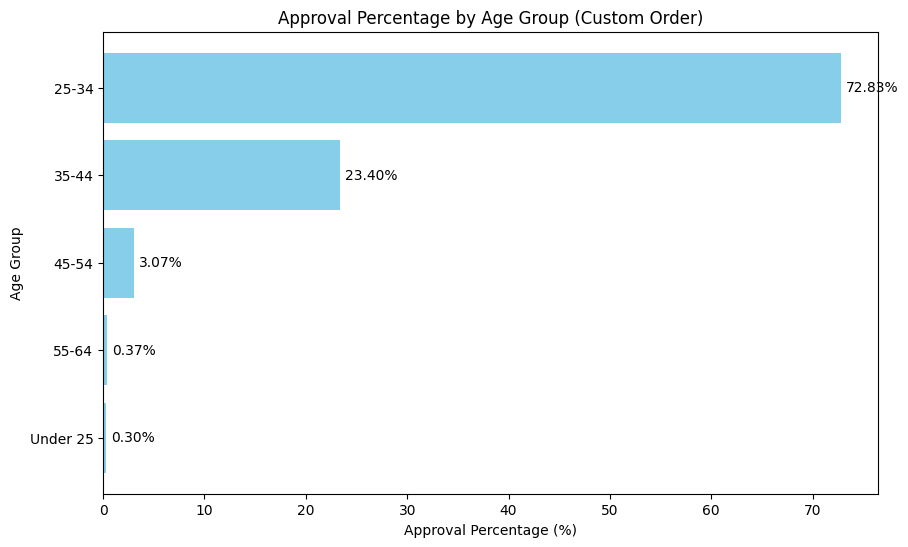

In [281]:
data = {
    'age_group': ['25-34', '35-44', '45-54', '55-64', 'Under 25'],
    'approved_count': [72443, 23279, 3055, 364, 296],
    'age_group_percentage': [72.83, 23.40, 3.07, 0.37, 0.30]
}
df = pd.DataFrame(data)
age_order = ['Under 25', '55-64', '45-54', '35-44', '25-34']
df['age_group'] = pd.Categorical(df['age_group'], categories=age_order, ordered=True)
df_sorted = df.sort_values('age_group')
plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted['age_group'], df_sorted['age_group_percentage'], color='skyblue')
plt.xlabel('Approval Percentage (%)')
plt.ylabel('Age Group')
plt.title('Approval Percentage by Age Group (Custom Order)')
for bar in bars:
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}%', va='center', fontsize=10)
plt.show()

The horizontal bar chart shows the percentage distribution of approved individuals across different age groups. It highlights that the vast majority of approvals fall within the 25-34 age group, accounting for 72.83% of all approvals. The next largest group is 35-44, with 23.40%, while other age groups such as 45-54, 55-64, and those under 25 have significantly smaller shares, representing only 3.07%, 0.37%, and 0.30%, respectively. This indicates that younger individuals, particularly those in the 25-34 and 35-44 age groups, dominate the approved category. The relatively lower percentages for other age groups suggest potential biases or trends favoring younger applicants or possibly higher application numbers from those age groups. Further investigation may be needed to determine if this trend is influenced by applicant demographics, qualifications, or external factors.

### What are the distributions of birth countries among beneficiaries? 

In [282]:
%%bigquery
SELECT
    h.country_of_birth AS Birth_Country,
    COUNT(*) AS Birth_Count
FROM
    (
        SELECT *
        FROM ba775-project-team-6.h1b_dataset.2021 AS h
        LEFT JOIN ba775-project-team-6.state_data.2021 AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM ba775-project-team-6.h1b_dataset.2022 AS h
        LEFT JOIN ba775-project-team-6.state_data.2022 AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM ba775-project-team-6.h1b_dataset.2023 AS h
        LEFT JOIN ba775-project-team-6.state_data.2023 AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
    ) AS h
GROUP BY
    h.country_of_birth
ORDER BY
    Birth_Count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,Birth_Country,Birth_Count
0,IND,59363
1,CHN,19693
2,TWN,1492
3,KOR,1418
4,CAN,1090
...,...,...
181,TCA,1
182,LSO,1
183,DJI,1
184,KNA,1


In [283]:
%%bigquery
WITH filtered_data AS (
    SELECT *,
           SAFE_CAST(ben_year_of_birth AS INT64) AS year_of_birth
    FROM (
        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2021` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2021` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
        
        UNION ALL
        
        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2022` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2022` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
        
        UNION ALL
        
        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2023` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2023` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
    )
)
SELECT *
FROM filtered_data
LIMIT 5;


Query is running:   0%|          |

Downloading:   0%|          |

,bcn,country_of_birth,country_of_nationality,ben_date_of_birth,ben_year_of_birth,gender,employer_name,FEIN,mail_addr,city,...,id of state,state_1,GDP of state,GDP ratio of state,GDP per capital of state,Median Household Income by State,Unemployment Rates of state,population of state,population ratio of state,year_of_birth
0,(b)(6),IND,IND,(b)(6),1975,male,TRINCHESE IRON WORKS & CONSTRUCTION INC,200236706,234 Belmont Ave,Brooklyn,...,NY,New York,1775710000000,8.25%,110980,"81,600",4.00%,19571216,5.93%,1975
1,(b)(6),MYS,MYS,(b)(6),1984,female,"PayPal, Inc.",770510487,2211 N 1st St,San Jose,...,CA,California,3233150000000,15.03%,99329,"89,870",4.80%,38965193,11.81%,1984
2,(b)(6),GBR,GBR,(b)(6),1982,male,"Red Box Recorders, Ltd.",981226347,450 Lexington Avenue,New York,...,NY,New York,1775710000000,8.25%,110980,"81,600",4.00%,19571216,5.93%,1982
3,(b)(6),IND,IND,(b)(6),1989,female,R1 RCM Inc.,020698101,"Triangle Plaza, 8750 W. Bryn Mawr",Chicago,...,IL,Illinois,875510000000,4.07%,87520,"87,820",4.50%,12549689,3.81%,1989
4,(b)(6),KOR,KOR,(b)(6),1992,male,JDC HEALTHCARE PLLC,752518300,3030 Lbj Fwy.,Dallas,...,TX,Texas,2032930000000,9.45%,84708,"79,060",3.90%,30503301,9.25%,1992


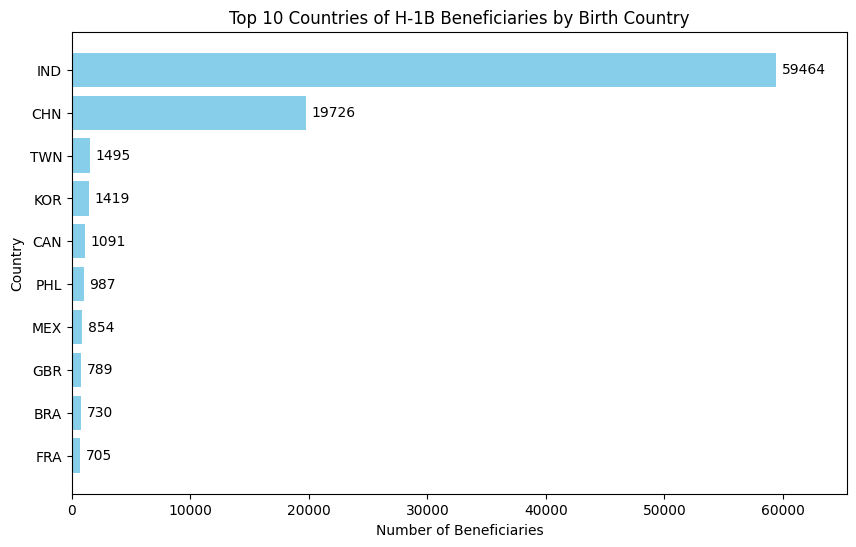

In [284]:

import matplotlib.pyplot as plt
labels = ['IND', 'CHN', 'TWN', 'KOR', 'CAN', 'PHL', 'MEX', 'GBR', 'BRA', 'FRA']
sizes = [59464, 19726, 1495, 1419, 1091, 987, 854, 789, 730, 705]  # Replace with actual top 10 values
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, sizes, color='skyblue')
plt.xlabel("Number of Beneficiaries")
plt.ylabel("Country")
plt.title("Top 10 Countries of H-1B Beneficiaries by Birth Country")
plt.gca().invert_yaxis()  
for bar in bars:
    plt.text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2,  
             f'{int(bar.get_width())}', va='center')

plt.xlim(0, max(sizes) * 1.1) 
plt.show()

 ### What are the distributions of nationality among beneficiaries

In [285]:
%%bigquery
SELECT
    h.country_of_nationality AS Nationality,
    COUNT(*) AS Nationality_Count
FROM
    (
        SELECT *
        FROM ba775-project-team-6.h1b_dataset.2021 AS h
        LEFT JOIN ba775-project-team-6.state_data.2021 AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM ba775-project-team-6.h1b_dataset.2022 AS h
        LEFT JOIN ba775-project-team-6.state_data.2022 AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM ba775-project-team-6.h1b_dataset.2023 AS h
        LEFT JOIN ba775-project-team-6.state_data.2023 AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
    ) AS h
GROUP BY
    h.country_of_nationality
ORDER BY
    Nationality_Count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,Nationality,Nationality_Count
0,IND,59285
1,CHN,19261
2,CAN,2443
3,TWN,1429
4,KOR,1400
...,...,...
167,QAT,1
168,MRT,1
169,VCT,1
170,undefined,1


According to the Institute of International Education's "Open Doors Report," India and China were the top two countries of origin for students studying in the United States during the 2020-2021 academic year, with 167,582 students from China and 167,582 students from India. Many international students tend to later extend their stay to pursue advanced degrees in very sought-after fields, such as engineering, computer science, and business. These are the same fields that the U.S. job market is driving up demand for with H-1B visas.

The H-1B beneficiary data heavily reflects these countries, with close to 60,000 beneficiaries from India and nearly 20,000 from China. This reflects the large pipeline of professionals coming from these countries who finally get into H-1B employment after completing their education in the U.S. Taiwan, South Korea, and even Canada all appear on the list, but with far fewer applicants, likely due to their smaller populations and/or lower numbers of students resident in the U.S. compared to India and China.

## Education

### Distribution of educational level among all beneficiaries

In [286]:
%%bigquery
SELECT
    ED_LEVEL_DEFINITION AS education_level,
    COUNT(*) AS total_approved_count,
    ROUND(COUNT(*) / SUM(COUNT(*)) OVER () * 100,2) AS approved_percentage
FROM
(
    SELECT *
    FROM ba775-project-team-6.h1b_dataset.2021 AS h
    LEFT JOIN ba775-project-team-6.state_data.2021 AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved'

    UNION ALL

    SELECT *
    FROM ba775-project-team-6.h1b_dataset.2022 AS h
    LEFT JOIN ba775-project-team-6.state_data.2022 AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved'

    UNION ALL

    SELECT *
    FROM ba775-project-team-6.h1b_dataset.2023 AS h
    LEFT JOIN ba775-project-team-6.state_data.2023 AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved'
) AS h
GROUP BY
    ED_LEVEL_DEFINITION
ORDER BY
    total_approved_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,education_level,total_approved_count,approved_percentage
0,MASTER'S DEGREE,66089,66.44
1,BACHELOR'S DEGREE,24802,24.93
2,DOCTORATE DEGREE,7278,7.32
3,PROFESSIONAL DEGREE,1214,1.22
4,"1 OR MORE YEARS OF COLLEGE, NO DEGREE",34,0.03
5,ASSOCIATE'S DEGREE,28,0.03
6,HIGH SCHOOL GRADUATE,20,0.02
7,NO DIPLOMA,3,0.00
8,"SOME COLLEGE CREDIT, BUT LESS THAN 1 YEAR",1,0.00
9,NO CODE PROVIDED OR ILLEGIBLE,1,0.00


### The distribution of educational level among beneficiaries from the top 2 countries

In [287]:
%%bigquery
SELECT
    h.country_of_nationality AS Nationality,
    ED_LEVEL_DEFINITION AS education_level,
    COUNT(*) AS total_approved_count,
    ROUND(COUNT(*) / SUM(COUNT(*)) OVER (PARTITION BY h.country_of_nationality) * 100, 2) AS approved_percentage_nationwide
FROM
(
    SELECT *
    FROM ba775-project-team-6.h1b_dataset.2021 AS h
    LEFT JOIN ba775-project-team-6.state_data.2021 AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved' AND h.country_of_nationality IN ('IND', 'CHN')

    UNION ALL

    SELECT *
    FROM ba775-project-team-6.h1b_dataset.2022 AS h
    LEFT JOIN ba775-project-team-6.state_data.2022 AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved' AND h.country_of_nationality IN ('IND', 'CHN')

    UNION ALL

    SELECT *
    FROM ba775-project-team-6.h1b_dataset.2023 AS h
    LEFT JOIN ba775-project-team-6.state_data.2023 AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved' AND h.country_of_nationality IN ('IND', 'CHN')
) AS h
WHERE ED_LEVEL_DEFINITION IN ('MASTER\'S DEGREE', 'BACHELOR\'S DEGREE', 'DOCTORATE DEGREE', 'PROFESSIONAL DEGREE')
GROUP BY
    Nationality, ED_LEVEL_DEFINITION
ORDER BY
    Nationality, total_approved_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,Nationality,education_level,total_approved_count,approved_percentage_nationwide
0,CHN,MASTER'S DEGREE,13307,69.14
1,CHN,DOCTORATE DEGREE,3327,17.29
2,CHN,BACHELOR'S DEGREE,2337,12.14
3,CHN,PROFESSIONAL DEGREE,275,1.43
4,IND,MASTER'S DEGREE,43953,74.16
5,IND,BACHELOR'S DEGREE,13412,22.63
6,IND,DOCTORATE DEGREE,1597,2.69
7,IND,PROFESSIONAL DEGREE,303,0.51


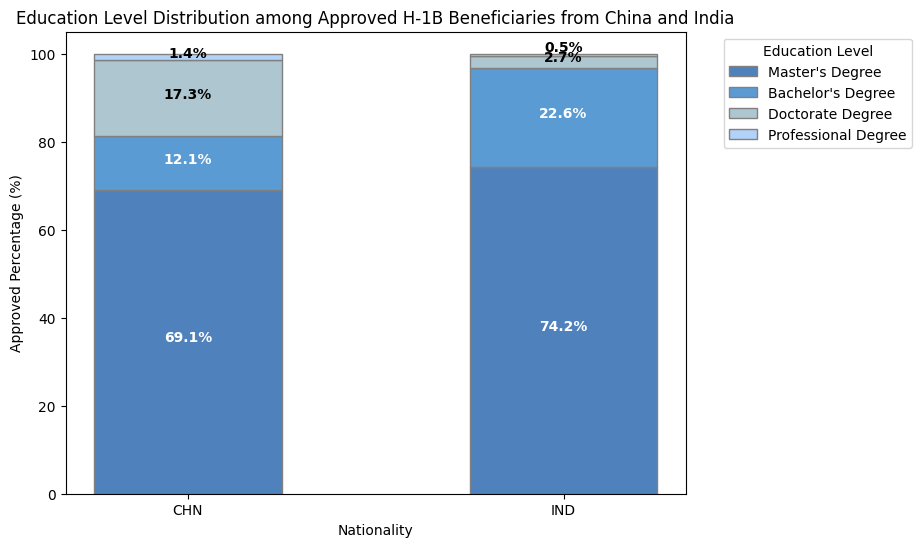

In [288]:
import matplotlib.pyplot as plt
import numpy as np
labels = ["CHN", "IND"]
r = np.arange(len(labels))

plt.figure(figsize=(8, 6))
plt.bar(r, master, color=colors[0], edgecolor="grey", width=barWidth, label="Master's Degree")
plt.bar(r, bachelor, bottom=master, color=colors[1], edgecolor="grey", width=barWidth, label="Bachelor's Degree")
plt.bar(r, doctorate, bottom=np.array(master) + np.array(bachelor), color=colors[2], edgecolor="grey", width=barWidth, label="Doctorate Degree")
plt.bar(r, professional, bottom=np.array(master) + np.array(bachelor) + np.array(doctorate), color=colors[3], edgecolor="grey", width=barWidth, label="Professional Degree")

for i in range(len(r)):
    plt.text(r[i], master[i] / 2, f"{master[i]}%", ha="center", color="white", weight="bold")
    plt.text(r[i], master[i] + bachelor[i] / 2, f"{bachelor[i]}%", ha="center", color="white", weight="bold")
    plt.text(r[i], master[i] + bachelor[i] + doctorate[i] / 2, f"{doctorate[i]}%", ha="center", color="black", weight="bold")
    if labels[i] == "IND":
        plt.text(r[i], master[i] + bachelor[i] + doctorate[i] + professional[i] + 0.5, f"{professional[i]}%", ha="center", color="black", weight="bold")
    else:
        plt.text(r[i], master[i] + bachelor[i] + doctorate[i] + professional[i] / 2, f"{professional[i]}%", ha="center", color="black", weight="bold")

plt.xlabel("Nationality")
plt.ylabel("Approved Percentage (%)")
plt.title("Education Level Distribution among Approved H-1B Beneficiaries from China and India")
plt.xticks(r, labels)
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

These insights show that most applicants are highly educated, with a significant concentration of advanced degree holders. Among the approved applicants, 66.44% hold a Master's degree, followed by 24.93% with a Bachelor's degree. Although they are smaller in number, Doctorate degree holders make up 7.32% of the group, which could highlight the emphasis on specialized expertise in the U.S. job market. This could reflect both the supply of highly qualified candidates and the demand for advanced skills in fields like technology, engineering, and research.

Looking at China and India, two of the leading countries of origin for H-1B visa holders, a similar pattern emerges. In India, 74.16% of applicants hold a Master's degree, while 69.14% of Chinese applicants have the same level of education. Doctorate degrees are less common but still represent a notable portion: 17.29% of approvals from China and 2.69% from India. This emphaises that the H-1B program focuses on people with advanced knowledge and skills, particularly above the undergraduate level.

## Wage Analysis

### How do average and median wages for approved H-1B visa holders vary by states and territories? - Manyi

In [289]:
%%bigquery
SELECT
    WORKSITE_STATE AS State,
    ROUND(AVG(CAST(BEN_COMP_PAID AS FLOAT64)),2) AS Average_Wage,
    APPROX_QUANTILES(CAST(BEN_COMP_PAID AS FLOAT64), 2)[OFFSET(1)] AS Median_Wage
FROM
(
    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2021` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2021` AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved' 

    UNION ALL

    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2022` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2022` AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved' 

    UNION ALL

    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2023` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2023` AS s ON h.state = s.`id of state`
    WHERE h.FIRST_DECISION = 'Approved' 
) AS h
GROUP BY
    WORKSITE_STATE
ORDER BY
    Average_Wage DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,State,Average_Wage,Median_Wage
0,CA,122343.49,120240.00
1,WA,120970.70,118000.00
2,CT,113784.09,86500.00
3,NY,109700.32,95680.00
4,OR,104974.71,109805.00
5,MA,104207.96,94500.00
6,OK,103062.69,74000.00
7,AZ,102508.91,84000.00
8,DC,100274.54,90000.00
9,NJ,99953.01,89918.40


The average and median wages for approved H-1B visa holders vary significantly across states. California (CA) leads with the highest average wage of approximately 122,343 dollars, followed closely by Washington (WA) at 120,970 dollars and Connecticut (CT) at 113,784 dollars. States such as New York (NY), Oregon (OR), and Massachusetts (MA) also rank high in average wages, reflecting the demand for specialized skills and possibly the high cost of living in these areas. Conversely, states like West Virginia (WV) and the Virgin Islands (VI) exhibit some of the lowest average wages, with WV at 69,976 dollars and VI at 66,086 dollars. This wage distribution highlights regional economic disparities and could be influenced by factors such as local industry demand, cost of living, and state-specific economic policies impacting H-1B visa wages.

## Industry

### How do H-1B approval rates vary across industries. Do these rates change over the years?

In [290]:
%%bigquery
WITH industry_approval_counts AS (
    SELECT
        h.NAICS_code,
        EXTRACT(YEAR FROM PARSE_DATE('%m/%d/%Y', h.first_decision_date)) AS approval_year,
        COUNT(*) AS approval_count
    FROM (
        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2021` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2021` AS s
        ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2022` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2022` AS s
        ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2023` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2023` AS s
        ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
    ) AS h
    GROUP BY h.NAICS_code, approval_year
),
yearly_growth AS (
    SELECT
        NAICS_code,
        approval_year,
        approval_count,
        LAG(approval_count) OVER (PARTITION BY NAICS_code ORDER BY approval_year) AS previous_year_count
    FROM
        industry_approval_counts
)
SELECT
    NAICS_code,
    approval_year,
    (approval_count - previous_year_count) / NULLIF(previous_year_count, 0) * 100 AS yearly_growth
FROM
    yearly_growth
WHERE
    previous_year_count IS NOT NULL
ORDER BY
    approval_year ASC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,NAICS_code,approval_year,yearly_growth
0,54172,2021,-50.000000
1,33641,2021,50.000000
2,333120,2021,-42.857143
3,62131,2021,0.000000
4,523110,2021,0.121065



The data shows significant differences in growth across industries. For example, NAICS code 451120 (Sporting Goods Stores) had a huge growth of 950% in 2021, while NAICS code 335311 (Motor and Generator Manufacturing) saw a decline of -26.47%. In 2022, industries like NAICS code 52231 (Mortgage and Nonmortgage Loan Brokers) and NAICS code 52312 (Securities Brokerage) grew by 400%-600%, indicating strong performance in certain sectors.

### What is the average and median wage for approved H-1B visas, segmented by industry?

In [291]:
%%bigquery
SELECT NAICS_CODE AS industry,
       AVG(SAFE_CAST(BEN_COMP_PAID AS FLOAT64)) AS avg_wage,
       APPROX_QUANTILES(SAFE_CAST(BEN_COMP_PAID AS FLOAT64), 2)[OFFSET(1)] AS median_wage
FROM `ba775-project-team-6.h1b_dataset.2021`
GROUP BY NAICS_CODE
ORDER BY avg_wage DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,industry,avg_wage,median_wage
0,1132,247908.000000,225000.00
1,6211,236666.666667,120000.00
2,621512,230672.000000,230672.00
3,485310,190300.000000,190300.00
4,212221,186032.146667,90900.00
...,...,...,...
1101,4441,29.900000,29.90
1102,812332,27.390000,27.39
1103,4421,26.440000,26.44
1104,44111,24.000000,24.00


## Deeper Insights and Relations

### What is the gender distribution across different job positions?

In [292]:
%%bigquery

SELECT JOB_TITLE, gender, COUNT(*) AS count,
ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY JOB_TITLE), 2) AS gender_percentage
FROM (
    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2021` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2021` AS s
    ON h.state = s.`id of state`

    UNION ALL

    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2022` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2022` AS s
    ON h.state = s.`id of state`

    UNION ALL

    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2023` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2023` AS s
    ON h.state = s.`id of state`
)
WHERE gender NOT IN ('(b)(3) (b)(6) (b)(7)(c)')
AND JOB_TITLE NOT IN ('(b)(3) (b)(6) (b)(7)(c)')
GROUP BY JOB_TITLE, gender
ORDER BY JOB_TITLE, gender
LIMIT 5

Query is running:   0%|          |

Downloading:   0%|          |

,JOB_TITLE,gender,count,gender_percentage
0,.NET C DEVELOPER,male,1,100.00
1,.NET DEVELOPER,female,5,33.33
2,.NET DEVELOPER,male,10,66.67
3,.NET Developer,female,1,100.00
4,.NET ENGINEER 2,male,1,100.00


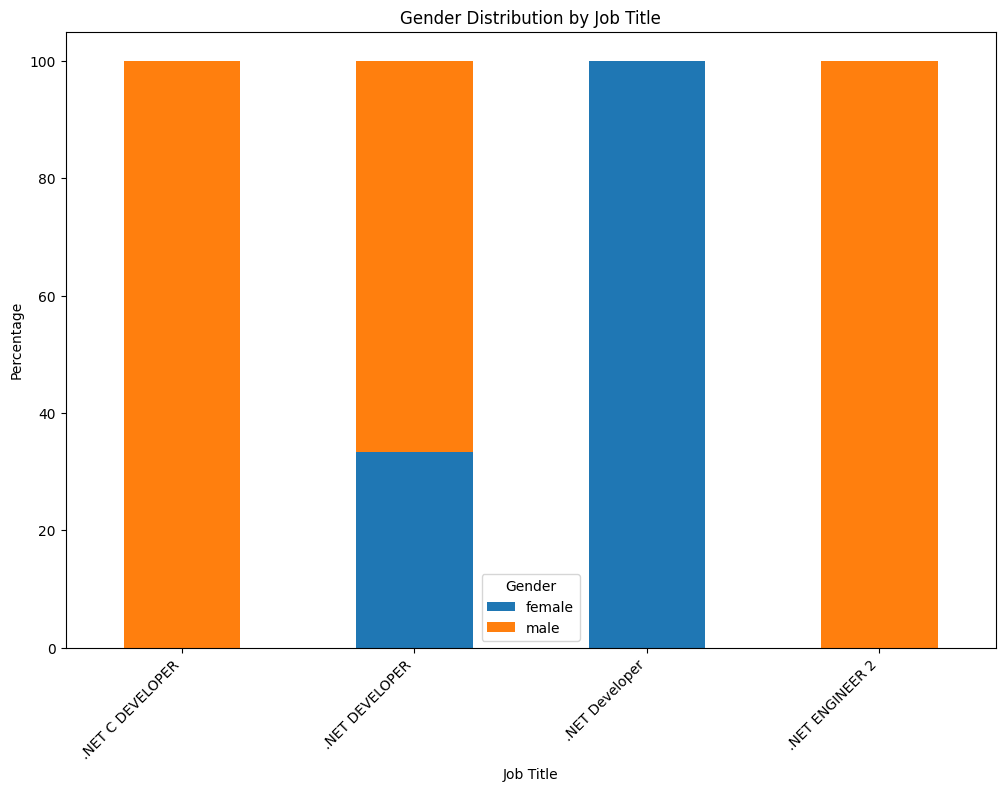

In [293]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt

client = bigquery.Client()

query = """
SELECT JOB_TITLE, gender, COUNT(*) AS count,
ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY JOB_TITLE), 2) AS gender_percentage
FROM (
    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2021` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2021` AS s
    ON h.state = s.`id of state`

    UNION ALL

    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2022` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2022` AS s
    ON h.state = s.`id of state`

    UNION ALL

    SELECT *
    FROM `ba775-project-team-6.h1b_dataset.2023` AS h
    LEFT JOIN `ba775-project-team-6.state_data.2023` AS s
    ON h.state = s.`id of state`
)
WHERE gender NOT IN ('(b)(3) (b)(6) (b)(7)(c)')
AND JOB_TITLE NOT IN ('(b)(3) (b)(6) (b)(7)(c)') -- Exclude unwanted values in JOB_TITLE as well
GROUP BY JOB_TITLE, gender
ORDER BY JOB_TITLE, gender
LIMIT 5
"""

df = client.query(query).to_dataframe()

# Plotting
pivot_df = df.pivot(index='JOB_TITLE', columns='gender', values='gender_percentage')

pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Gender Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Percentage')
plt.legend(title='Gender')

plt.xticks(rotation=45, ha='right')

plt.show()


The bar chart shows the gender distribution by job title for various developer positions. The y-axis represents the percentage of each gender, while the x-axis lists specific job titles. The bars are color-coded by gender, with male and female distributions displayed separately.
 Some job titles, like ".NET C Developer" and ".NET Engineer 2," are entirely dominated by one gender (male or female). This may indicate a lack of gender diversity in these specific roles. However, the job title ".NET Developer" shows a more balanced gender distribution compared to other roles, with both male and female employees represented.

### How does the distribution of gender and age change over time?

In [294]:
query = """
WITH filtered_data AS (
    SELECT *,
           SAFE_CAST(ben_year_of_birth AS INT64) AS year_of_birth
    FROM (
        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2021` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2021` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2022` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2022` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'

        UNION ALL

        SELECT *
        FROM `ba775-project-team-6.h1b_dataset.2023` AS h
        LEFT JOIN `ba775-project-team-6.state_data.2023` AS s ON h.state = s.`id of state`
        WHERE h.FIRST_DECISION = 'Approved'
    )
    WHERE REGEXP_CONTAINS(ben_year_of_birth, r'^\d+$')
),
age_group_data AS (
    SELECT *,
           CASE 
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) < 25 THEN 'Under 25'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 25 AND 34 THEN '25-34'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 35 AND 44 THEN '35-44'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 45 AND 54 THEN '45-54'
               WHEN (EXTRACT(YEAR FROM CURRENT_DATE()) - year_of_birth) BETWEEN 55 AND 64 THEN '55-64'
               ELSE '65 and above'
           END AS age_group
    FROM filtered_data
)

SELECT lottery_year, age_group, gender,COUNT(*) AS count
FROM age_group_data
GROUP BY lottery_year, age_group, gender
ORDER BY lottery_year, age_group, gender
"""
result = client.query(query).to_dataframe()
result.head()

,lottery_year,age_group,gender,count
0,2021,25-34,female,10424
1,2021,25-34,male,17586
2,2021,35-44,female,3260
3,2021,35-44,male,5952
4,2021,45-54,female,263


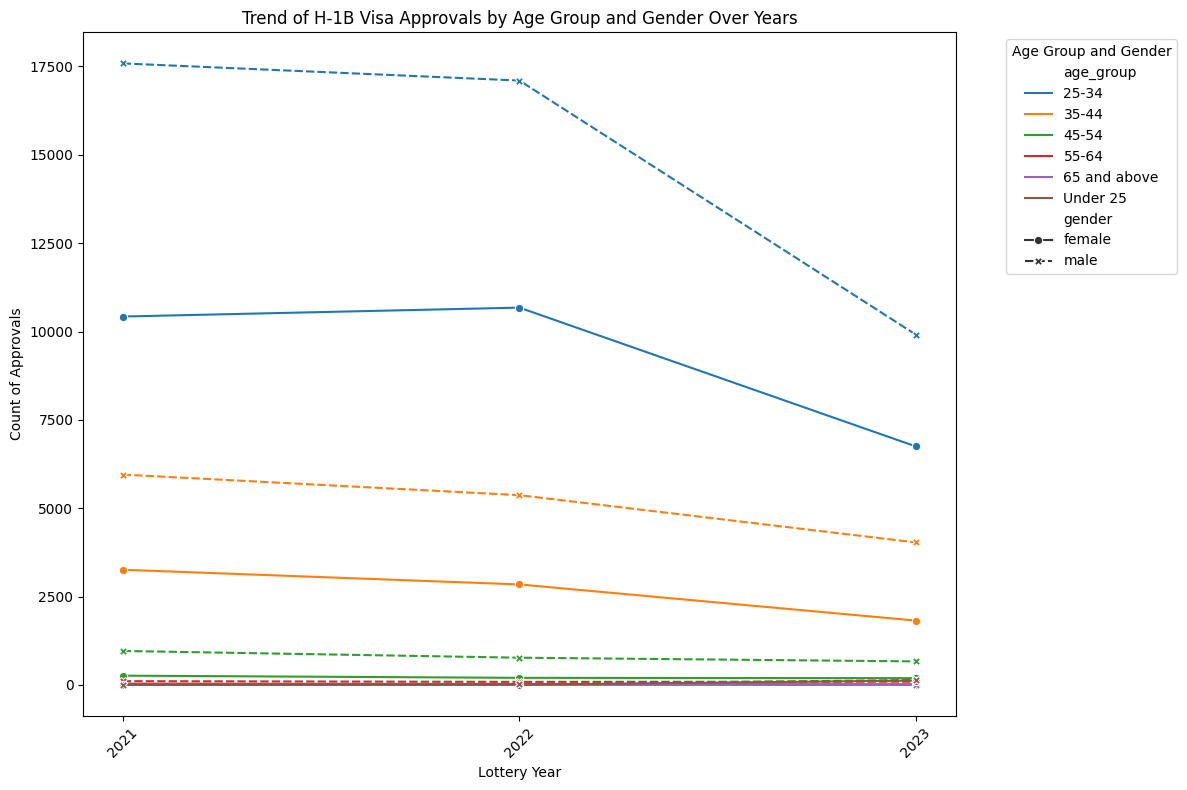

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.lineplot(data=result, x='lottery_year', y='count', hue='age_group', style='gender', markers=True, dashes=True)

plt.title('Trend of H-1B Visa Approvals by Age Group and Gender Over Years')
plt.xlabel('Lottery Year')
plt.ylabel('Count of Approvals')

plt.legend(title='Age Group and Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Here we see a general decrease in H-1B visa approvals across all age groups from 2021 to 2023, with the steepest decline seen in the 25-34 age group.
The 25-34 age group consistently has the highest number of approvals, followed by the 35-44 age group, while the 45-54, 55-64, and 65+ groups have significantly lower counts.
Moreover, males generally have higher approval counts than females across all age groups, though the gap is more pronounced in the younger age groups, particularly in the 25-34 and 35-44 age ranges.

## Conclusion

Based on the analysis, several key insights emerged regarding H-1B visa approvals. The data showed a noticeable gender disparity, with males comprising a larger portion of approved applicants compared to females. This trend suggests potential systemic factors influencing approval outcomes and may require further examination to understand underlying causes and mitigate disparities.

In terms of age distribution, a significant concentration of approvals falls within the 25-34 age group, followed by the 35-44 group. This trend indicates a preference or higher qualification rate among younger applicants, possibly due to career stage and skills alignment with U.S. market needs. Older age groups have far fewer approvals, raising questions about possible biases or demographic differences in applicant pools.

Nationality analysis highlighted that India and China are the dominant countries among H-1B beneficiaries. This reflects the robust pipeline of professionals from these countries pursuing H-1B visas, often after completing advanced degrees in the U.S. Moreover, a large proportion of these applicants hold advanced degrees, particularly master’s degrees, showcasing a high level of specialization.

Industry growth data indicates variable demand across sectors, with some experiencing significant increases in H-1B sponsorship while others decline. This trend suggests that market demand for specific skills is evolving, with high growth observed in sectors like securities brokerage and mortgage services.

### Generative AI Disclosure

In completing this project, we relied on Generative AI tools to support us in different parts of our work. Here’s a breakdown of how these tools helped:

1. Debugging Code Issues: Whenever we ran into coding errors or had trouble figuring out why our code wasn’t working, we turned to ChatGPT for help. The AI explained the errors in detail and offered suggestions, making it easier for us to combine this guidance with what we learned in class and fix the problems effectively.

2. Understanding the Dataset: Some of the columns in our dataset had information that wasn’t fully explained in the data dictionary, so we used ChatGPT to fill in the gaps. The AI helped us understand the practical meaning behind certain columns, making it clearer how each part of the dataset contributed to the bigger picture.

3. Grammar Checks: To make sure our writing was clear and professional, we ran our texts through ChatGPT for grammar suggestions. This step helped us refine our work, catch small errors, and present our findings more effectively.

4. Visualization Advice: When it came to data visualization, ChatGPT provided tips on what styles and layouts might work best to tell our story. The AI helped us preview different options, giving us a better sense of what would be both visually appealing and easy to understand for our audience.

We reviewed, edited, and validated all AI-generated content ourselves to make sure it met our standards for accuracy and originality, following academic integrity guidelines.

### References

U.S. Department of State. (n.d.). Visa statistics. U.S. Department of State - Bureau of Consular Affairs. https://travel.state.gov/content/travel/en/legal/visa-law0/visa-statistics.html

DataCamp. (n.d.). SQL basics cheat sheet. DataCamp. Retrieved November 11, 2024, from https://www.datacamp.com/cheat-sheet/sql-basics-cheat-sheet

U.S. Bureau of Labor Statistics. (n.d.). Regional and State Employment and Unemployment [PDF]. U.S. Bureau of Labor Statistics. Retrieved from https://www.bls.gov/news.release/pdf/srgune.pdf

Statista. (n.d.). Per capita U.S. real Gross Domestic Product (GDP) by state from 1997 to 2021. Retrieved from https://www.statista.com/statistics/248063/per-capita-us-real-gross-domestic-product-gdp-by-state/

USAFacts. (n.d.). USAFacts. Retrieved from https://usafacts.org/

WiseVoter. (n.d.). GDP Growth by State. Retrieved from https://wisevoter.com/state-rankings/gdp-growth-by-state/#google_vignette